# **HW4_pyhealth_preprocess**

## Overview

pyhealth can handle data process in a very efficient way. This pyhealth homework will introduce two very useful and flexible tools ```pyhealth.datasets``` and ```pyhealth.tasks```.

pyhealth.datasets provides processing functions for all open EHR datasets, such as MIMIC-III, eICU, MIMIC-IV, and all OMOP-CDM based dataset. It can help transform the unstructured data into a unified structured object without loss of information. See document at https://pyhealth.readthedocs.io/en/latest/api/datasets.html.

pyhealth.tasks provides several examples of healthcare tasks. You can follow the templates and define your own healthcare tasks. We will practice it. See document at https://pyhealth.readthedocs.io/en/latest/api/tasks.html.

    
This assignment is designed to get you familiar with ```pyhealth.datasets``` and ```pyhealth.tasks```. After finishing the homework, I am sure that you will use the modules to help implement part of the final projects. 

6 EXERCISES

## 1 pyhealth.datasets

- **[Arguments]**: 
  - `root` is the arguments directing to the data folder, e.g., "mimiciii/1.4/".
  - `tables` is a list of table names from raw databases, which specifies the information that will be used in building your dataset.
  - `code_mapping [default: None]` asks a directionary input, specifying the new coding systems for each data table. For example, `{"NDC": ("ATC", {"target_kwargs": {"level": 3}})},` means that our pyhealth will automatically change the codings from `NDC` into `ATC-3` level for tables if any. Look up [here](https://pyhealth.readthedocs.io/en/latest/api/medcode.html#diagnosis-codes) and check which code transforms are supported.
  - ``dev``: whether to enable dev mode (only use a small subset of the data)
  Default is False.
  - ``refresh_cache``: whether to refresh the cache; if true, the dataset will be processed from scratch and the cache will be updated. Default is False.      
 
- **[Functionality]**: currently, we provide the api for:
  - [MIMIC3Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html)
  - [MIMIC4Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC4Dataset.html)
  - [eICUDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.eICUDataset.html)
  - [OMOPDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.OMOPDataset.html): any OMOP-CDM based databases.
  
<img src="img/dataset.png" width="800">

## 1.1 MIMIC-III data (synthetic)
- we want to process the MIMIC-III data by [pyhealth.datasets.MIMIC3Dataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.MIMIC3Dataset.html). 

  - The root of this datasets is in (we use a synthetic MIMIC-III for demo)
    - `https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/`.
  - For each patient's ICU stay, user wants to obtain the `DIAGNOSES_ICD.csv`, `PRESCRIPTIONS.csv` and `PROCEDURES_ICD.csv` tables. **Note that, different databases have different raw table names**.
  - Further, user wants to `map the ICD9CM codes into CCSCM codes` for ease of downstream prediction applications.


### TODO: process this synthetic MIMIC-III data

_Hint:_

MIMIC3Dataset(
- Argument 1: It specifies the data folder root.   
    `root = 'https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/',`
  
- Argument 2: The users need to input a list of raw table names (e.g., DIAGNOSES_ICD.csv, PROCEDURES_ICD.csv).  
    `tables = ['DIAGNOSES_ICD', 'PRESCRIPTIONS', 'PROCEDURES_ICD']`,
  
- Argument 3: This argument input a dictionary (key is the source code   
  - vocabulary and value is the target code vocabulary .   
  - Default is empty dict, which means the original code will be used.  
    `code_mapping = {"ICD9CM": "CCSCM"},`  
)

In [1]:
from pyhealth.datasets import MIMIC3Dataset

# CODE
mimic3_ds = MIMIC3Dataset(
    root = 'https://storage.googleapis.com/pyhealth/Synthetic_MIMIC-III/',
    tables = ['DIAGNOSES_ICD', 'PRESCRIPTIONS', 'PROCEDURES_ICD'],
    code_mapping = {"ICD9CM": "CCSCM"}
)
# END

- **[Output]:** user can check the output by calling the `.info()` function. The output `mimics_ds.patients` is a dict structure, key is the `patient_id` and the value is [Patient](https://pyhealth.readthedocs.io/en/latest/api/data/pyhealth.data.Patient.html) object. The output structure is exactly the one that we have built in **HW3_pyhealth_data**.

In [2]:
mimic3_ds.info()

In [3]:
# You can also print the statistics of the entire dataset.
mimic3_ds.stat()

### TODO: calculate number of patients and visits

- use ```.patients``` to obtain the patient dictionary
- for each patient, use ```.visits``` to obtain all visits under the patient

[Datasets Tutorial](https://colab.research.google.com/drive/18kbzEQAj1FMs_J9rTGX8eCoxnWdx4Ltn?usp=sharing#scrollTo=Mon6Tol-01gB)

#### get patient dictionary
```
patient_dict = mimic3_ds.patients
print(list(patient_dict.keys())[:10])
```
#### get the "10005" patient
```
patient = patient_dict["1005"]
patient.gender, patient.birth_datetime
```
#### get the visit list of this patient
```
visit_dict = patient.visits
print (list(visit_dict.keys()))
```

In [4]:
num_of_patients = len(list(mimic3_ds.patients.keys()))

num_of_visits = None
# CODE

num_of_visits = 0
pat_dict = mimic3_ds.patients
for pat in pat_dict:
    num_of_visits += len(list(pat_dict[pat].visits.keys()))
# END

In [5]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



## 1.2 OMOP-CDM data
In this section, we want to use the same way to load an OMOP-CDM formatted dataset by [pyhealth.datasets.OMOPDataset](https://pyhealth.readthedocs.io/en/latest/api/datasets/pyhealth.datasets.OMOPDataset.html). The process procedure is very similar to **1.1**, but with standard OMOP-CDM table names (learn more here https://www.ohdsi.org/data-standardization/).

### TODO: process the following dataset
- data folder is https://storage.googleapis.com/pyhealth/synpuf1k_omop_cdm_5.2.2
- the tables being processed are ```condition_occurrence.csv```, ```procedure_occurrence.csv```, ```drug_exposure.csv```
- no code mapping is needed

In [6]:
from pyhealth.datasets import OMOPDataset

omop_ds = OMOPDataset(root = 'https://storage.googleapis.com/pyhealth/synpuf1k_omop_cdm_5.2.2/',
                        tables = ['condition_occurrence', 
                                  'procedure_occurrence', 
                                  'drug_exposure'
                                 ],
                      code_mapping={},
                     )

In [7]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''



## 2 Design a healthcare ML task on MIMIC-III

Given the ```mimic3_ds```, we want to define a healthcare ML task on it to further get ready for ML models.
- We will first use the **mortality prediction** task from ```pyhealth.tasks```.
- Then, we will define and customize our own healthcare tasks on need.
  
<img src="img/task.png" width="800">

## 2.1 transform MIMIC-III for mortality prediction task
- call ```.set_task()``` and finish it in one line!

In [8]:
from pyhealth.tasks import mortality_prediction_mimic3_fn
dataset = mimic3_ds.set_task(mortality_prediction_mimic3_fn)

In [9]:
# check the stats
dataset.stat()

We can check the samples ready to be used for downstream ML models.

In [10]:
print ("number of data samples in this task:", len(dataset.samples))
print ("the first sample:")

"""
- "visit_id", "patient_id" 
    - can be used to do train/val/test split
- "conditions", "procedures", "drugs" 
    - can be used as feature in the downstream models;
- "label" 
    - is the mortality label
"""
dataset.samples[0]


## 2.2 define our our own mortality prediction on MIMIC-III

Instead of using the example task functions, we can also define our own task below.

### TODO: build a new mortality prediction task function
- the input of the task function is one patient, and we are going to generate several samples from the patient following the task definition.

#### requirements
- use only `PROCEDURES_ICD` and `PRESCRIPTIONS` as two feature inputs
- remove visit that has empty prescriptions or empty procedures

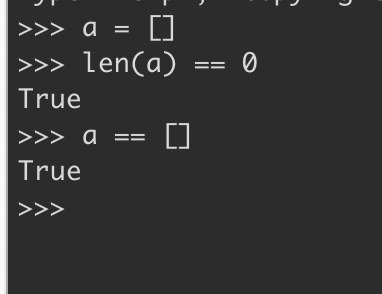

In [16]:
def new_mortality_prediction_for_mimic3(patient):
    """
    Mortality prediction aims at predicting whether the patient will decease in the
        next hospital visit based on the clinical information from current visit.
    """
    samples = []
    
    # enumerate each visit pair (cur_visit, next_visit)
    for visit_idx in range(len(patient) - 1):
        cur_visit = patient[visit_idx]
        next_visit = patient[visit_idx + 1]

        # obtain the label
        if next_visit.discharge_status not in [0, 1]:
            mortality_label = 0
        else:
            mortality_label = int(next_visit.discharge_status)

        # TODO: use only PROCEDURES_ICD and PRESCRIPTIONS as two feature inputs
        procedures = cur_visit.get_code_list(table="PROCEDURES_ICD")
        
        # CODE
        prescriptions = cur_visit.get_code_list(table="PRESCRIPTIONS")
        # END

        # assemble the sample
        new_sample = {
            "visit_id": cur_visit.visit_id,
            "patient_id": patient.patient_id,
            "prescriptions": prescriptions,
            "procedures": procedures,
            "label": mortality_label,
        }

        # TODO: remove visit that has empty prescriptions or empty procedures
        """
        if empty prescriptions or empty procedures
            samples not add new_sample
        else:
            samples.append(new_sample)
        """
        #  CODE
        
        if len(new_sample['prescriptions']) == 0 or new_sample['procedures'] == []:
            pass
        else: samples.append(new_sample)
    
        # END
        
    return samples

In [17]:
# # get the visit list of this patient
# visit_dict = patient.visits
# print (list(visit_dict.keys()))
# visit.get_event_list('DIAGNOSES_ICD')
# rx_dict = mimic3_ds.prescriptions
# print(list(rx_dict.keys())[:10])

In [18]:
# set the new task and show the statistics
new_dataset = mimic3_ds.set_task(new_mortality_prediction_for_mimic3)
new_dataset.stat()

In [19]:
# show the first sample of the new dataset
new_dataset.samples[0]

In [20]:
'''
AUTOGRADER CELL. DO NOT MODIFY THIS.
'''

